# NIHCXR Clinical Drift Experiments Tutorial

## Import Libraries and Load NIHCXR Dataset

In [1]:
from functools import partial

from monai.transforms import AddChanneld, Compose, Lambdad, Resized, ToDeviced
from torchxrayvision.models import DenseNet

from cyclops.data.loader import load_nihcxr
from cyclops.data.slicer import SliceSpec
from cyclops.data.utils import apply_transforms
from cyclops.monitor import ClinicalShiftApplicator, Detector, Reductor, TSTester
from cyclops.monitor.plotter import plot_drift_experiment, plot_drift_timeseries
from cyclops.monitor.utils import get_device

device = get_device()

nih_ds = load_nihcxr("/mnt/data/clinical_datasets/NIHCXR")

/home/amritk/.cache/pypoetry/virtualenvs/pycyclops-mhx6UJW0-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example 1. Generate Source/Target Dataset for Experiments (1-2)

In [2]:
shifter = ClinicalShiftApplicator(
    "sex", source=None, target="F", shift_id="Patient Gender"
)
source_ds, target_ds = shifter.apply_shift(nih_ds, num_proc=6)

transforms = Compose(
    [
        AddChanneld(keys=("features",), allow_missing_keys=True),
        Resized(
            keys=("features",), spatial_size=(1, 224, 224), allow_missing_keys=True
        ),
        Lambdad(
            keys=("features",),
            func=lambda x: ((2 * (x / 255.0)) - 1.0) * 1024,
            allow_missing_keys=True,
        ),
        ToDeviced(keys=("features",), device=device, allow_missing_keys=True),
    ]
)

source_ds = source_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)
target_ds = target_ds.with_transform(
    partial(apply_transforms, transforms=transforms),
    columns=["features"],
    output_all_columns=True,
)

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 74415.73 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 101343.01 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 116554.24 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 143287.94 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 76392.82 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 108119.06 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 132332.99 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 142231.42 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:00<00:00, 155548.60 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:00<00:00, 164392.37 examples/s]

## Example 2. Sensitivity test experiment with 3 dimensionality reduction techniques


Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 16.84 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.98 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.98 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.40 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 52.38 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 55.12 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.90 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.48 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.46 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.48 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.04 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.66 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.45 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.85 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.85 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.44 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.64 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.67 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.27 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.39 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.71 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 37.86 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 42.98 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 47.23 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 49.26 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 48.82 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.01 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.80 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.08 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 29.65 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 36.72 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.02 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 28.13 examples/s]

Map:  48%|████▊     | 96/200 [00:03<00:02, 35.65 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 40.69 examples/s]

Map:  80%|████████  | 160/200 [00:04<00:00, 44.04 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 46.46 examples/s]

Map: 100%|██████████| 200/200 [00:05<00:00, 46.16 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.73 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.85 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.53 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.89 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.96 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.85 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.38 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.45 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.34 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.62 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.53 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.69 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.00 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.02 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.03 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 44.63 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 48.33 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.27 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.54 examples/s]

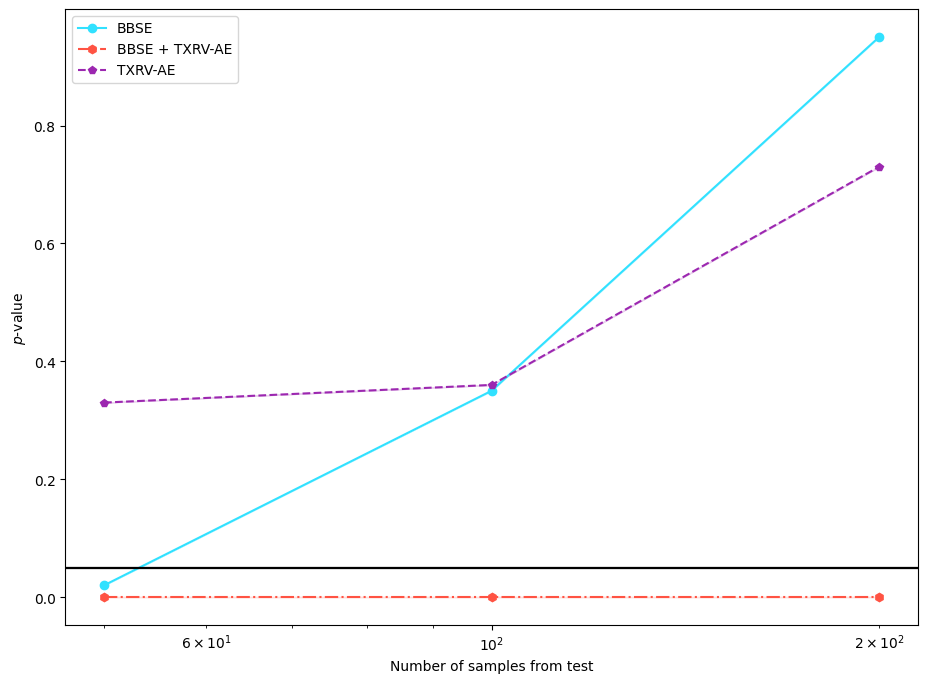

In [3]:
model = DenseNet(weights="densenet121-res224-all")
dr_methods = {
    "BBSE": "bbse-soft",
    "BBSE + TXRV-AE": "bbse-soft+txrv-ae",
    "TXRV-AE": "txrv-ae",
}
results = {}

for name, dr_method in dr_methods.items():
    if name == "TXRV-AE":
        reductor = Reductor(dr_method=dr_method, device=device)
    else:
        reductor = Reductor(dr_method=dr_method, model=model, device=device)
    detector = Detector(
        "sensitivity_test",
        reductor=reductor,
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    result = detector.detect_shift(source_ds, target_ds)
    results[name] = result
plot_drift_experiment(results)

## Example 3. Sensitivity test experiment with models trained on different datasets

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.24 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.06 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.31 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.02 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.22 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.11 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.39 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.13 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.31 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 17.24 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 30.01 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 38.40 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.86 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.79 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.76 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.75 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.50 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.81 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.53 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.51 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 33.56 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 43.14 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.35 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.48 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 54.63 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 54.76 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.94 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.12 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.99 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.96 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.83 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.02 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.06 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.89 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.13 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.14 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.08 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.24 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.25 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.74 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.35 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.10 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.38 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.76 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.33 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.01 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.68 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.74 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.58 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.23 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 18.20 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.12 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 39.61 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.05 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 50.47 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.02 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.68 examples/s]

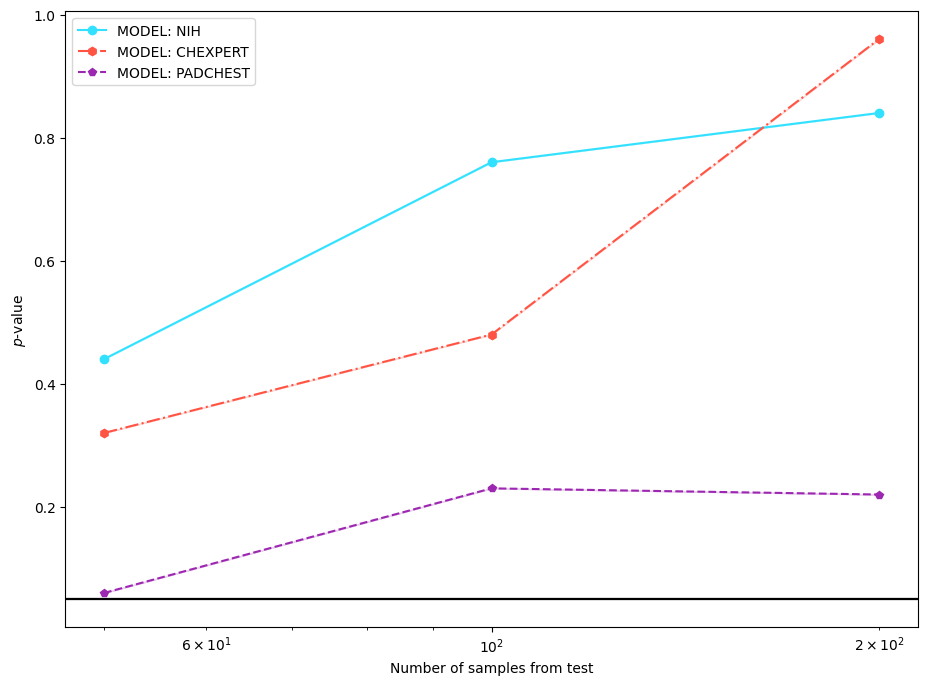

In [4]:
models = {
    "MODEL: NIH": "densenet121-res224-nih",
    "MODEL: CHEXPERT": "densenet121-res224-chex",
    "MODEL: PADCHEST": "densenet121-res224-pc",
}
results = {}

for model_name, model in models.items():
    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(
            dr_method="bbse-soft", model=DenseNet(weights=model), device=device
        ),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[model_name] = detector.detect_shift(source_ds, target_ds)
plot_drift_experiment(results)

## Example 4. Sensitivity test experiment with different clinical shifts

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 52131.31 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 73713.80 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84427.93 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 92702.55 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 96639.15 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 99764.18 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 47728.02 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 63558.20 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 76268.71 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 85163.46 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 91312.50 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 96257.80 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.09 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 33.03 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 41.66 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.97 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.63 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.26 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 55.69 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.02 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 27.01 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.51 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.43 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.33 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 18.95 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.66 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.65 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.62 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.21 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 52.54 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 52.15 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50932.14 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 72749.60 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84132.29 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 90694.31 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 94822.93 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 97963.80 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50304.97 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 72312.17 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 83822.58 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 90791.91 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 95251.41 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 98476.54 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.69 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 33.75 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 43.45 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 50.58 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 55.22 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.52 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.87 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.90 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.96 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.62 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.31 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.14 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.16 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 29.91 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 38.79 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 45.39 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.31 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 50.99 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 50.97 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 53794.39 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 75266.38 examples/s]

Filter (num_proc=6):  41%|████▏     | 46374/112120 [00:00<00:01, 61440.68 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 96687.46 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 99094.59 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 101661.15 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50851.71 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 69281.17 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84102.45 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 91277.16 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 95893.62 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 99094.68 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.27 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.69 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.02 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 49.17 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 54.25 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 57.18 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.56 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.55 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.68 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.95 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.29 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 39.76 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.37 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 32.33 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.36 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.07 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 49.76 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 51.89 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 51.31 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 54721.03 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:00, 75741.29 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 83794.68 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 90739.82 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 94893.58 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 97654.94 examples/s]

Filter (num_proc=6):   0%|          | 0/112120 [00:00<?, ? examples/s]

Filter (num_proc=6):  17%|█▋        | 18687/112120 [00:00<00:01, 50295.09 examples/s]

Filter (num_proc=6):  33%|███▎      | 37374/112120 [00:00<00:01, 71700.43 examples/s]

Filter (num_proc=6):  50%|█████     | 56061/112120 [00:00<00:00, 84858.53 examples/s]

Filter (num_proc=6):  67%|██████▋   | 74748/112120 [00:00<00:00, 88399.86 examples/s]

Filter (num_proc=6):  83%|████████▎ | 93434/112120 [00:01<00:00, 92203.93 examples/s]

Filter (num_proc=6): 100%|██████████| 112120/112120 [00:01<00:00, 96169.64 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:09, 17.33 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 30.92 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.75 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 47.80 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.48 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.79 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.53 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.23 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.07 examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Map:  32%|███▏      | 32/100 [00:01<00:03, 18.79 examples/s]

Map:  64%|██████▍   | 64/100 [00:02<00:01, 31.95 examples/s]

Map:  96%|█████████▌| 96/100 [00:02<00:00, 40.56 examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.21 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 31.53 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 40.06 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 46.08 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 51.03 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 53.61 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 53.39 examples/s]

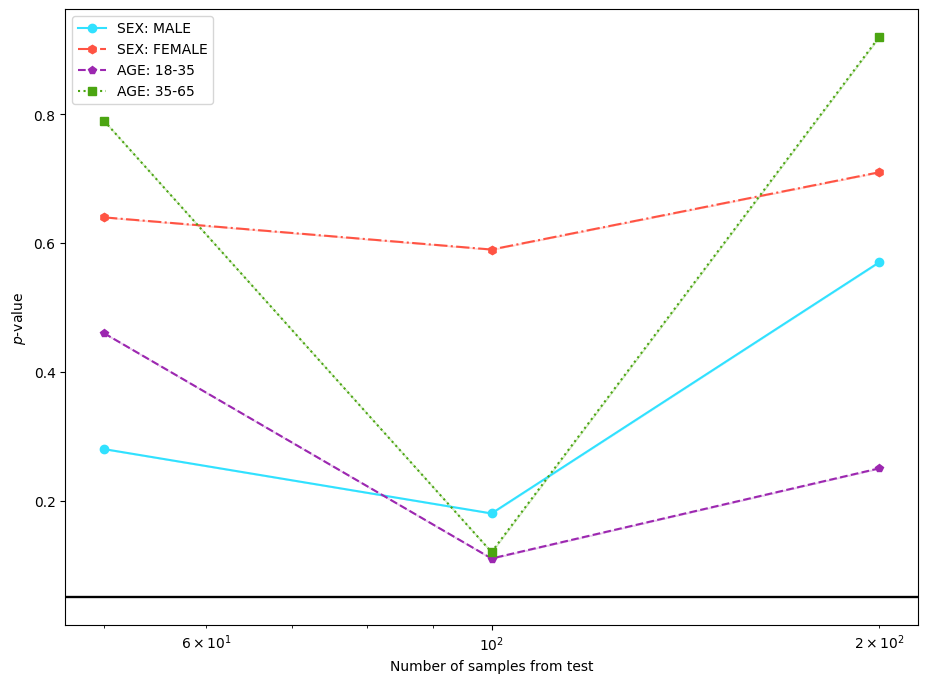

In [5]:
model = DenseNet(weights="densenet121-res224-all")
source_slice = None
target_slices = {
    "SEX: MALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "M"}}]),
    "SEX: FEMALE": SliceSpec(spec_list=[{"Patient Gender": {"value": "F"}}]),
    "AGE: 18-35": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 18, "max_value": 35}}]
    ),
    "AGE: 35-65": SliceSpec(
        spec_list=[{"Patient Age": {"min_value": 35, "max_value": 65}}]
    ),
}
results = {}

for name, target_slice in target_slices.items():
    source_slice = None
    shifter = ClinicalShiftApplicator(
        "custom", source=source_slice, target=target_slice
    )
    ds_source, ds_target = shifter.apply_shift(nih_ds, num_proc=6)

    ds_source = ds_source.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )
    ds_target = ds_target.with_transform(
        partial(apply_transforms, transforms=transforms),
        columns=["features"],
        output_all_columns=True,
    )

    detector = Detector(
        "sensitivity_test",
        reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
        tester=TSTester(tester_method="mmd"),
        source_sample_size=200,
        target_sample_size=[50, 100, 200],
        num_runs=1,
    )
    results[name] = detector.detect_shift(ds_source, ds_target)
plot_drift_experiment(results)

## Example 5. Rolling window experiment with synthetic timestamps using biweekly window

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:  16%|█▌        | 32/200 [00:01<00:08, 19.61 examples/s]

Map:  32%|███▏      | 64/200 [00:02<00:04, 33.14 examples/s]

Map:  48%|████▊     | 96/200 [00:02<00:02, 42.58 examples/s]

Map:  64%|██████▍   | 128/200 [00:03<00:01, 48.97 examples/s]

Map:  80%|████████  | 160/200 [00:03<00:00, 53.62 examples/s]

Map:  96%|█████████▌| 192/200 [00:04<00:00, 56.37 examples/s]

Map: 100%|██████████| 200/200 [00:04<00:00, 56.06 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.74 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.82 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.46 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.30 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.54 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.62 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.70 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.35 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.01 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.94 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.30 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.93 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.06 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.73 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.01 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.88 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.06 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.09 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 19.35 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.54 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.73 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.19 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.44 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.43 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 15.69 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 22.44 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.30 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.34 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 12.58 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 19.11 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.43 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.46 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.49 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.51 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 12.70 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 19.53 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.81 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.55 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.93 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.89 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:02<00:01, 13.46 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 19.73 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.90 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.76 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.91 examples/s]

Map: 100%|██████████| 50/50 [00:01<00:00, 27.13 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.54 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.48 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:00, 18.54 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 26.66 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 17.98 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 25.30 examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

Map:  64%|██████▍   | 32/50 [00:01<00:01, 16.99 examples/s]

Map: 100%|██████████| 50/50 [00:02<00:00, 24.73 examples/s]

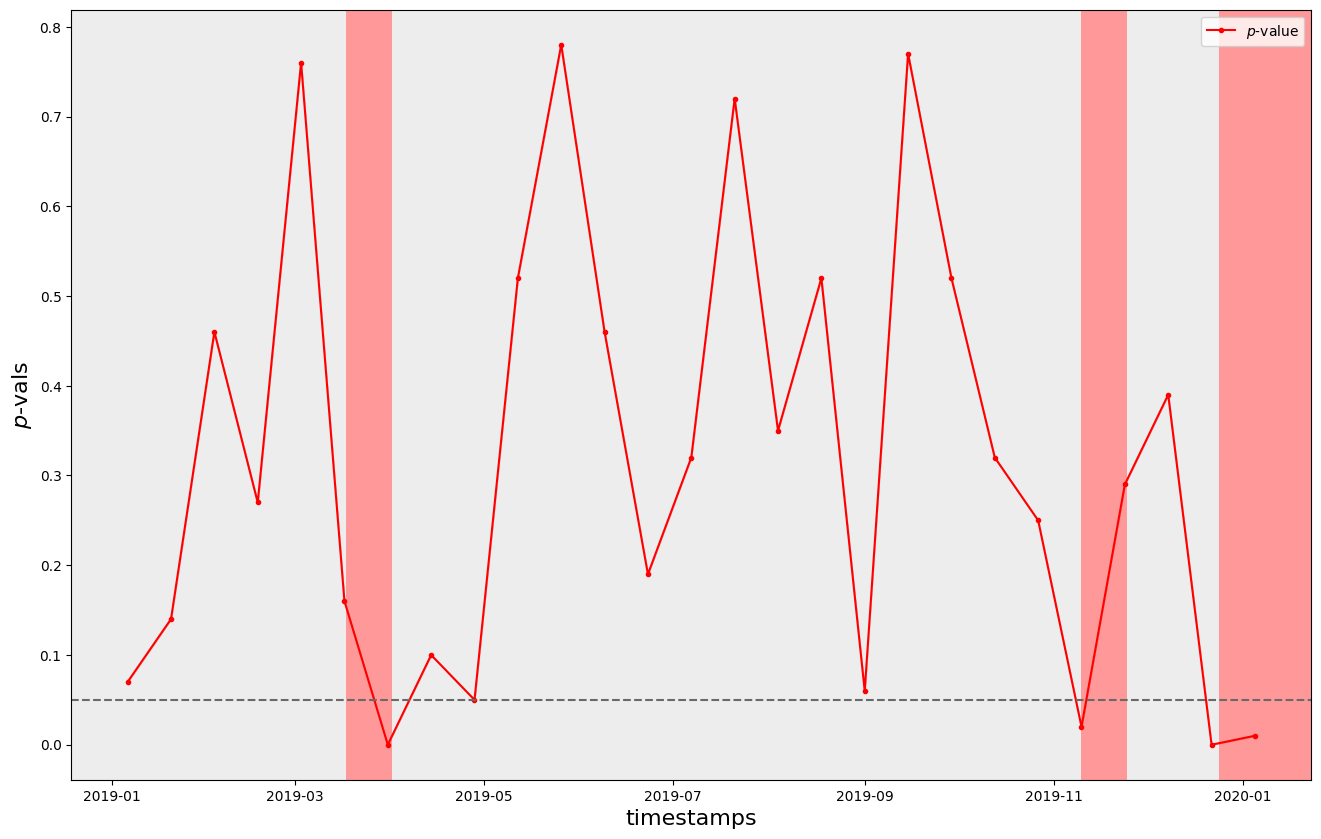

In [6]:
model = DenseNet(weights="densenet121-res224-all")
detector = Detector(
    "rolling_window_drift",
    reductor=Reductor(dr_method="bbse-soft", model=model, device=device),
    tester=TSTester(tester_method="mmd"),
    source_sample_size=200,
    target_sample_size=50,
    timestamp_column="timestamp",
    window_size="2W",
)

results = detector.detect_shift(source_ds, target_ds)
plot_drift_timeseries(results)